# Introducción a redes neuronales artificiales con Keras

Las redes neuronales artificiales (RNAs) aparecieron en la investigación en Inteligencia Artificial en el año 1943 en un artículo escrito por un neurofisiólogo y un matemático (McCulloch & Pitts 1943).

Había mucho interés al principio, con predicciones que iban a desarrollar "máquinas inteligentes". Pero la realidad no fue así (las redes neuronales en esa época todavía eran bastante básicas). La comunidad se perdió interés en ~1960s.

~1980s inventaron nuevas arquitecturas y métodos de entrenamiento, pero el progreso fue lento y en los 90 otros métodos fueron inventados (e.g. *support vector machines*). Se fue el interés de nuevo...

Hoy en día, hay mucho más interés en RNAs. Por qué?

* Hay muchos datos para entrenar las redes neuronales, y frecuentemente superan los otros métodos en problemas grandes y complejos.
* Hay mucho más poder computacional (GPUs).
* Los algoritmos de entrenamiento han sido mejorados.
* Algunas limitaciones de las RNAs no son tan graves (por ejemplo, es poco común encontrar un mínimo local en el entrenamiento, y si pasa, muchas veces están cercas al mínimo global).
* Hoy en día es una tecnología **exponencial**: hay mucho interés, así que atraen investigadores y fondos, los resultados mejoran y genera más interés...

##### Neuronas biológicas

![](figures_intro_rna/fig10-1.png)

Cada neurona es bastante simple, pero están organizadas en una red de billones de neuronas, cada una con conexiones a miles de otras.

![](figures_intro_rna/fig10-2.png)

### Cálculos lógicos con neuronas

El modelo de una neurona **artificial**, desarrollado por McCulloch y Pitts, es mucho más básico: tiene entradas binarias y una salida binaria. La neurona se activa cuando hay más que un cierto número de sus entradas activas.

![](figures_intro_rna/fig10-3.png)

* La primera red a la izquierda es la función de identidad: si neurona $A$ se activa, neurona $C$ se activa también.
* La segunda red corresponde al operador lógico AND: neurona $C$ se activa solamente cuando ambas neuronas $A$ y $B$ se activan.
* La tercera red corresponde al operador lógico OR: neurona $C$ se activa si $A$ o $B$ se activan.
* Finalmente, si se puede tener conexiones que inhiben la actividad de una neurona, la cuarta red corresponde a $A$ AND NOT $B$: neurona $C$ se activa solamente si $A$ se activa y $B$ se apaga.

En principio, podemos combinar redes así para calcular cualquier expresión lógica.

### El Perceptrón

Inventado en 1957 por Frank Rosenblatt, basado en un modelo para una neurona que se llama **unidad lógica de umbral** (*threshold logic unit*, TLU).

Las entradas y salida ahora son números y cada conexión de entrada está asociada con un peso.

La TLU calcula la suma ponderada de sus entradas:

$$z = w_1x_1 + w_2x_2 + \cdots + w_nx_n = \boldsymbol{x}^T \boldsymbol{w}$$

Después se aplica una función escalón para determinar la salida de la neurona:

$$h_w(\boldsymbol{x}) = \Theta(z)$$

![](figures_intro_rna/fig10-4.png)

Típicamente se usa la función escalón de Heaviside. A veces se usa la función de signo:

$\Theta(z) = \begin{cases} 0 & z < 0 \\ 1 & z \geq 0 \end{cases}$

$\text{sgn}(z) = \begin{cases} -1 & z < 0 \\ 0 & z = 0 \\ +1 & z > 0 \end{cases}$

Un **perceptrón** está compuesto de una capa de TLUs, con cada TLU conectada a todas las entradas.

Cuando todas las neuronas en una capa están conectadas a todas las neuronas en la capa anterior, se llama una **capa totalmente conectada** o una **capa densa**.

Para enfatizar que todas las entradas van a todas las TLU, es común dibujar una capa de neuronas de entrada, que solamente pasan sus entradas a la próxima capa (*passthrough neurons*). Todas las neuronas de entrada forman la **capa de entrada**.

Típicamente un *bias feature* está agregado ($x_0 = 1$) usando una neurona de *bias* que siempre tiene salida igual a $1$.

![](figures_intro_rna/fig10-5.png)

El perceptrón arriba puede clasificar instancias en $3$ clases binarias diferentes simultaneamente, así que es un clasificador de *multioutput*.

Se puede determinar las salidas de una capa densa (totalmente conectada) usando:

$$h_{\boldsymbol{W},\boldsymbol{b}}(\boldsymbol{X}) = \phi(\boldsymbol{X}\boldsymbol{W}+\boldsymbol{b})$$

* $\boldsymbol{X}$ es una matriz de *features* de entrada, una fila por instancia, una columna por *feature*.
* $\boldsymbol{W}$ es una matriz de pesos, que contiene todos los pesos de las conexiones aparte de las conexiones con la neurona de *bias*. Tiene una fila por neurona de entrada, y una columna por neurona TLU.
* El vector de *bias* $\boldsymbol{b}$ contiene todos los pesos de las conexiones entre la neurona de *bias* y las neuronas TLU. Hay un término de *bias* por neurona TLU.
* La función $\phi$ se llama la **función de activación**. En el caso de una TLU, es una función escalón.

##### Entrenamiento de un perceptrón

Rosenblatt propuso la **regla de Hebb** para entrenar un perceptrón. Motivada por el comportamiento de neuronas biológicas, la regla de Hebb aumenta el peso de una conexión entre dos neuronas cuando ambas neuronas tienen la misma salida.

De hecho, un perceptrón ocupa una variante de esta regla que toma en cuenta el error de la red: hay refuerza de conexiones que ayudan en reducir el error.

La red recibe las instancias de entrenamiento una a la vez y realiza una predicción (hay una salida). Para cada neurona de salida que produce una predicción incorrecta, hay refuerza de los pesos de conexiones de entradas que habrían contribuido a una predicción correcta.

$$w_{i,j}^{(t+1)} = w_{i,j}^{(t)} + \eta \left( y_j - \hat{y}_j^{(t)} \right) x_i$$

* $w_{i,j}$ es el peso de la conexión entre la $i$-esima neurona de entrada y la $j$-esima neurona de salida.
* $x_i$ es el $i$-esima valor de entrada de la instancia de entrenamiento actual.
* $\hat{y}_j$ es la salida de la $j$-esima neurona de salida, para la instancia de entrenamiento actual.
* $y_j$ es la salida objetivo de la $j$-esima neurona de salida, para la instancia de entrenamiento actual.
* $\eta$ es la taza de aprendizaje.

El límite de decisión de cada neurona de salida es lineal, así que un perceptrón no puede aprender un patrón complejo.

Si las instancias están linealmente separables, Rosenblatt demostró que el algoritmo converge a una solución (**teorema de convergencia del Perceptrón**).

Scikit-Learn tiene la clase `Perceptron` que implementa una red con una sola TLU.

In [2]:
%pylab inline
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

Populating the interactive namespace from numpy and matplotlib


In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)] #longitud y ancho de los pétalos
y = (iris.target == 0).astype(np.int) #Iris setosa?

In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [5]:
y_pred = per_clf.predict([[2, 0.5]])

In [6]:
y_pred

array([0])

La clase `Perceptron` es equivalente a usar `SGDClassifier` con los siguientes hiperparámetros: `loss="perceptron", learning_rate="constant", eta0=1, penalty=None`.

Los perceptrones son limitados. Son incapaz de resolver algunos problemas triviales (clasificación de OR exclusivo, XOR)

![](figures_intro_rna/fig10-6.png)

Se puede superar estas limitaciones usando varias capas de perceptrones para formar un perceptrón de multicapa (*multilayer perceptron*, MLP).

El siguiente MLP puede resolver el problema de XOR:

![](figures_intro_rna/fig10-6b.png)

Todos los pesos de las conexiones son igual a $1$, aparte de las conexiones indicadas en rojo. Con entradas $(0,0)$ o $(1,1)$ la red da $0$, pero con entradas $(0,1)$ o $(1,0)$ la salida es $1$.

### Perceptrón Multicapa y *backpropagation*

Un MLP está compuesto de una capa de entrada (*passthrough*), una o más capas de TLUs (llamadas **capas ocultas**), y una capa final de TLUs llamada la capa de salida.

![](figures_intro_rna/fig10-7.png)

Cada capa aparte de la capa de salida incluye una neurona de *bias* y está conectada completamente a la próxima capa.

Una red neuronal con varias capas ocultas se llama una **red neuronal profunda** (*deep neural network*).

El algoritmo usado para el entrenamiento de una red neuronal profunda se llama ***backpropagation*** (Rumelhart et al. 1985)

### Propagación hacia atrás (*backpropagation*)

Ahora definimos el algoritmo de *backpropagation* para una red *feedforward*.

Tenemos los siguientes ingredientes:

* Datos: $\boldsymbol{X} = \left\{ (\boldsymbol{x}_1,\boldsymbol{y}_1),\ldots,(\boldsymbol{x}_N,\boldsymbol{y}_N) \right\}$


* Red neuronal *feedforward*: parámetros $\theta$, que son los pesos $w_{ij}^k$ (peso entre el nodo $j$ en la capa $l_k$ u el nodo $i$ en la capa $l_{k-1}$) y $b_i^k$ (el *bias* del nodo $i$ en la capa $l_k$). No hay conexiones entre neuronas en la misma capa y todas las capas son totalmente conectadas.


* Función de error (costo, perdida) $E(\boldsymbol{X},\theta)$ que define el error entre la salida deseada $\boldsymbol{y}_i$ y la salida calculada por la red $\hat{\boldsymbol{y}}_i$ en la entrada $\boldsymbol{x}_i$ para un conjunto de datos $\boldsymbol{X}$ y un valor específico de los parámetros $\theta$.

El entrenamiento con descenso por gradiente corresponde a la actualización de los parámetros de la red en la siguiente manera:

$$\theta^{t+1} = \theta^t - \alpha \frac{\partial E(\boldsymbol{X},\theta^t)}{\partial \theta}$$

Aquí vemos inmediatamente la razón por usar una función de activación diferenciable... Eso fue uno de las inovaciones del algoritmo de *backpropagation*.

Para simplificar la presentación del algoritmo, vamos a considerar una red con una sola salida $y$. Es decir, NO es un vector.

Una opción fácil para la función de costo es el error cuadrado promedio:

$$E(\boldsymbol{X},\theta) = \frac{1}{2M}\sum_{m=1}^M (\hat{y}_m - y_m)^2$$

Hay otras funciones usadas, dependiendo de la red y la tarea (clasificación multiclase, etc.).

Podemos incluir el *bias* como otro peso en la siguiente forma:

$$w_{0i}^k = b_i^k$$

y incluimos una salida de la neurona "$0$" (igual a $1$) en la capa $k-1$:

$$s_0^{k-1} = 1$$

Así que la "activación" de la neurona $i$ en la capa $k$ está dada por

$$a_i^k = b_i^k + \sum_{j=1}^{r_{k-1}}w_{ji}^ks_j^{k-1} = \sum_{j=0}^{r_{k-1}}w_{ji}^ks_s^{k-1}$$

La derivada de la función de costo con respecto a los pesos (incluyendo el *bias*) se puede escribir como

$$\frac{\partial E(\boldsymbol{X},\theta)}{\partial w_{ij}^k} = \frac{1}{M} \sum_{m=1}^M \frac{\partial}{\partial w_{ij}^k} \left( \frac{1}{2}(\hat{y}_m - y_m)^2 \right) = \frac{1}{M} \sum_{m=1}^M \frac{\partial E_m}{\partial w_{ij}^k}$$

Entonces, podemos calcular la derivada de la función de costo sumando las derivadas de $E_m$, la función de costo para cada par de entrada-salida. Entonces ahora escribimos simplemente $E$ (en vez de $E_m$) y consideramos solamente un par de entrada-salida:

$$E = \frac{1}{2}(\hat{y}-y)^2$$

Comenzamos con la aplicación de la regla de cadena:

$$\frac{\partial E}{\partial w_{ij}^k} = \frac{\partial E}{\partial a^k_j} \frac{\partial a^k_j}{\partial w_{ij}^k}$$

El primer factor típicamente se denomina el error, y se denota:

$$\delta_j^k \equiv \frac{\partial E}{\partial a^k_j}$$

Podemos calcular el otro factor usando la definición de la "activación" dada arriba:

$$\frac{\partial a^k_j}{\partial w_{ij}^k} = \frac{\partial}{\partial w_{ij}^k} \left( \sum_{l=0}^{r_{k-1}}w_{lj}^ks_l^{k-1} \right) = s_i^{k-1}$$

Entonces, queda

$$\frac{\partial E}{\partial w_{ij}^k} = \delta_j^ks_i^{k-1}$$

Para evaluar $\delta_j^k$ necesitamos elegir una función $E$ y una función de activación $g$. El proceso de *backpropagation* corresponde a la propagación hacia atrás del error.

#### La capa de salida

En este ejemplo tenemos una sola neurona en la última capa, así que hay que calcular $\delta_1^f$ donde $f$ es la capa final.

$$E = \frac{1}{2}(\hat{y} - y)^2 = \frac{1}{2}(g_o(a_1^f)-y)^2$$

donde $g_o(x)$ es la función de activación de la capa de salida. Entonces tenemos

$$\delta_1^f = (g_o(a_1^f)-y)g'_o(a_1^f) = (\hat{y}-y)g'_o(a_1^f)$$

y la derivada de la función de error en la última capa de la red queda

$$\frac{\partial E}{\partial w_{i1}^f} = \delta_1^f s_i^{f-1} = (\hat{y}-y)g'_o(a_1^f)s_i^{f-1}$$

#### Las capas ocultas

Aplicamos la regla de cadena de nuevo para calcular

$$\delta_j^k = \frac{\partial E}{\partial a_j^k} = \sum_{l=1}^{r^{k+1}} \frac{\partial E}{\partial a_{l}^{k+1}} \frac{\partial a_{l}^{k+1}}{\partial a_{j}^k}$$

donde $l = 1,\ldots,r^{k+1}$, el número de neuronas en la **próxima** capa. Podemos escribir la ecuación arriba como

$$\delta_j^k = \sum_{l=1}^{r^{k+1}} \delta_l^{k+1} \frac{\partial a_{l}^{k+1}}{\partial a_{j}^k}$$

La definición de $a_{l}^{k+1}$ es

$$a_l^{k+1} = \sum_{j=1}^{r^{k}} w_{jl}^{k+1} g(a_{j}^k)$$

donde $g(x)$ es la función de activación para las capas ocultas. Entonces, tenemos

$$\frac{\partial a_{l}^{k+1}}{\partial a_{j}^k} = w_{jl}^{k+1} g'(a_{j}^k)$$

y el error en las capas ocultas queda

$$\delta_j^k = \sum_{l=1}^{r^{k+1}}\delta_l^{k+1}w_{jl}^{k+1} g'(a_{j}^k) = g'(a_{j}^k)\sum_{l=1}^{r^{k+1}}\delta_l^{k+1}w_{jl}^{k+1}$$

Aquí vemos de donde viene el nombre *backpropagation*. El error en la capa $k$ depende de los errores en la capa $k+1$. Es decir, los errores se propagan hacia atrás...

#### El algoritmo completo

Ahora tenemos todos los ingredientes necesarios para implementar el algoritmo de *backpropagation* en una red *feedforward* con una sola neurona en la capa de salida.

1. Elegir **aleatoriamente** los pesos $w_{ij}^k$ y la taza de aprendizaje $\alpha$.


2. Calcular la pase hacia adelante (*forward pass*) para cada par de entrada-salida $(\boldsymbol{x}_m,y_m)$ y guardar los resultados $\hat{y}_m$, $a_j^k$ y $s_j^k$ para cada neurona $j$ en capa $k$, procediendo de la capa $0$ (entrada) hasta la capa $f$ (salida).


3. Calcular la pase hacia atrás (*backward pass*) para cada par de entrada-salida $(\boldsymbol{x}_m,y_m)$ y guardar los resultados $\partial E_m/\partial w_{ij}^k$ para cada peso $w_{ij}^k$ conectando neurona $i$ en capa $k-1$ con neurona $j$ en capa $k$, procediendo de la capa $f$ (salida) hasta la capa $1$ (entrada).

    1. Evaluar el error para la capa final $\delta_1^f$.
    2. Propagar hacia atrás los errores para las capas ocultas $\delta_j^k$, comenzando en $k=f-1$.
    3. Evaluar las derivadas parciales del error $E_m$ con respecto a $w_{ij}^k$


4. Promediar los gradientes $\partial E_m/\partial w_{ij}^k$ para obtener la derivada $\partial E(\boldsymbol{X},\theta)/\partial w_{ij}^k$ para todo el conjunto de datos.


5. Actualizar los pesos usando el negativo de los gradientes.

## [Keras](https://keras.io/)

![](figures_intro_rna/fig10-10.png)

## Implementando un MLP con Keras

Vamos a implementar un modelo para clasificar imagenes, con la función *softmax* como función de activación en la capa de salida.

Usaremos *Fashion MNIST*, imagenes de $28 \times 28$ pixeles, con $10$ clases. Cada imagen representa ropa o zapatos, así que las imagenes son más diversas que en el caso de MNIST.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

Vamos a escalar los *features* para ayudar el método de descenso por gradiente:

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Creamos una lista de nombres de las clases para estos datos:

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

![](figures_intro_rna/fig10-11.png)

Ahora, implementamos el modelo usando el API "secuencial" de Keras.

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

* `Sequential` significa construir el modelo capa por capa, conectadas secuencialmente. Se llama el API secuencial.

* La primera capa es `Flatten` que convierte cada imagene de entrada en un array unidimensional: aplica `X.reshape(-1, 1)`. Hay que especificar la forma de las instancias con `input_shape`. Un alternativo es usar una capa antes de `keras.layers.InputLayer`.

* La segunda capa (oculta) es `Dense` con $300$ neuronas. Ocupa la función de activación "ReLU". Cada capa densa maneja su propia matriz de pesos, con todas las conexiones entre las neuronas y sus entradas. También maneja un vector de *bias* (uno por neurona).

* La tercera capa (oculta) es `Dense` con $100$ neuronas, también con funciones de activación "ReLU".

* La última capa es `Dense` con $10$ neuronas (una por clase), con la función de activación *softmax*.

![](figures_intro_rna/relu.png)

La lista completa de funciones de activación está [aquí](https://keras.io/activations/).

Otro método de armar el modelo:

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


El modelo tiene **muchos** parámetros, así que hay mucho riesgo de *overfitting*, especialmente si tenemos muy pocos datos...

In [14]:
from keras.utils import plot_model

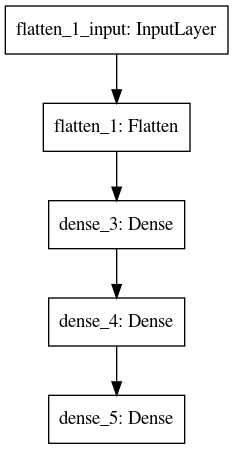

In [15]:
plot_model(model)

In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]

In [19]:
hidden1.name

'dense_3'

In [20]:
model.get_layer('dense_3') is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[-0.05857375,  0.01345541,  0.02950101, ...,  0.03264638,
         0.03299656, -0.01004117],
       [-0.06238474, -0.01696922, -0.00365889, ..., -0.00986675,
        -0.02094959, -0.0299071 ],
       [-0.03669054, -0.00370631, -0.0731606 , ..., -0.07421935,
        -0.05710587, -0.05018653],
       ...,
       [-0.06372381,  0.04984473, -0.00389662, ...,  0.03585874,
         0.063226  , -0.02182372],
       [-0.0501985 , -0.06869788,  0.01067672, ..., -0.02409806,
         0.04619578, -0.07279514],
       [-0.02049983,  0.02913231,  0.05829445, ..., -0.01215513,
        -0.04034815, -0.03252812]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

Se puede inicializar los pesos y *bias* con `kernel_initializer` o `bias_initializer` en el momento de crear la capa (por defecto los pesos son aleatorios y los *bias* son ceros).

#### Compilar el modelo

Después de definir el modelo, hay que usar `compile()` para especificar la función de costo y el optimizador. También se puede especificar una lista de métricas para calcular durante el entrenamiento y la evaluación.

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Usamos `sparse_categorical_crossentropy` ya que tenemos etiquetas "esparcidas" (los *targets* son números enteros entre $0$ y $9$) y las clases son exclusivas.

Si tuvieramos probabilidades por clase (con *one-hot vector* por ejemplo) usaríamos `categorical_crossentropy`.

Para clasificación binaria, usaríamos como función de activación en la última capa `sigmoid` (en vez de `softmax`) con `binary_crossentropy`.

In [27]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7338 - accuracy: 0.7598 - val_loss: 0.5134 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4910 - accuracy: 0.8285 - val_loss: 0.4545 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4441 - accuracy: 0.8442 - val_loss: 0.4205 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4159 - accuracy: 0.8541 - val_loss: 0.3935 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3961 - accuracy: 0.8603 - val_loss: 0.3781 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3800 - accuracy: 0.8653 - val_loss: 0.3715 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3660 - accuracy: 0.8709 - val_loss: 0.4256 - val_accuracy:

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

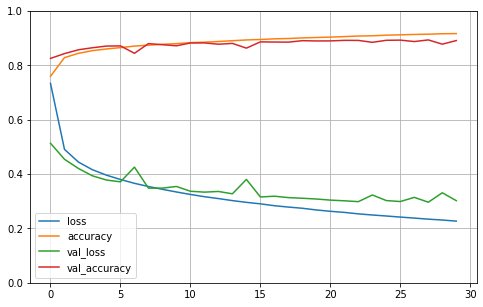

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Podemos evaluar el modelo en el conjunto de prueba:

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 81.3090 - accuracy: 0.8149


[81.30901336669922, 0.8148999810218811]

También podemos realizar predicciones:

In [31]:
X_new = X_test[:3] #usamos las primeras 3 imagenes 
                   #del conjunto de prueba como imagenes "nuevas"
y_proba = model.predict(X_new)

In [34]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [3]:
import numpy as np
from matplotlib.pyplot import imshow

In [38]:
np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

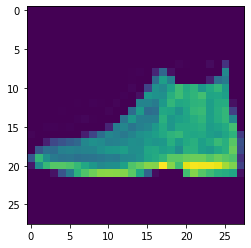

In [48]:
imshow(X_test[0,:])

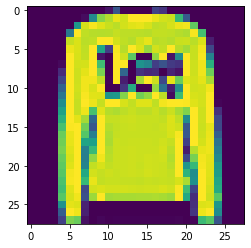

In [49]:
imshow(X_test[1,:])

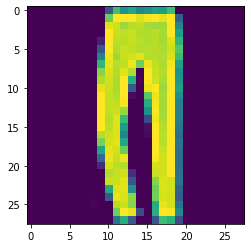

In [50]:
imshow(X_test[2,:])

## Regresión con el API secuencial

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
housing = fetch_california_housing()

In [104]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

In [105]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                     y_train_full)

In [106]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Para regresión necesitamos solamente una neurona en la capa de salida (queremos predecir un sólo valor) sin función de activación, y la función de costo es el error cuadrado promedio.

In [107]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [108]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [109]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0776 - val_loss: 10.2714
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8995 - val_loss: 0.4316
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3954 - val_loss: 0.4190
Epoch 4/20
 22/363 [>.............................] - ETA: 0s - loss: 0.3971

KeyboardInterrupt: 

In [59]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4103


In [60]:
X_new = X_test[:3]

In [61]:
y_pred = model.predict(X_new)

In [62]:
y_pred

array([[2.7080083 ],
       [3.6439445 ],
       [0.47018892]], dtype=float32)

In [63]:
y_new = y_test[:3]

In [64]:
y_new

array([3.312, 3.477, 1.625])

## Modelos complejos con el API funcional

Un ejemplo de un modelo **no secuencial** es una red neuronal "ancho y profundo" (*wide & deep*).

Modelos así conectan una parte de las entradas directamente con las salidas. Así la red puede aprender patrones profundas y reglas simples.

![](figures_intro_rna/fig10-14.png)

In [70]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

* `Input`: especifica el tipo y forma de entrada. Se puede tener varios entradas.

* Después creamos una capa densa con $30$ neuronas y función de activación "ReLU". Pasamos la capa de salida como argumento a una función para conectar ambas capas.

* Creamos otra capa densa, y pasamos la primera como argumento a la "función" para conectar las capas.

* `Concatenate` es para combinar las salidas de las capas de entrada y la segunda capa oculta.

* La capa de salida es una sola neurona, y pasamos como argumento la capa de concatenación.

* Finalmente creamos el modelo indicando las capas de entrada y salida.

Después tenemos que usar `compile()`, entrenar, evaluar, etc.

¿Qué hacemos si queremos usar una parte de los datos en la rama "profunda" de la red y otra parte en la rama "superficial"?

![](figures_intro_rna/fig10-15.png)

Podemos usar los *features* $0$ a $4$ en la entrada A, y los *features* $2$ a $7$ en la entrada B:

In [71]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Cuando usamos `fit()` hay que pasar un par de matrices como entradas `(X_train_A, X_train_B)`. También para validación y predicción.

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [73]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [74]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.1934 - val_loss: 1.1015
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7900 - val_loss: 0.7402
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6610 - val_loss: 0.6796
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6164 - val_loss: 0.6452
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5868 - val_loss: 0.6334
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5653 - val_loss: 0.6031
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5469 - val_loss: 0.5820
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5314 - val_loss: 0.5617
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5171 - val_loss: 0.5554
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5069 - val_loss: 0.5410

In [75]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4497


In [76]:
y_pred = model.predict((X_new_A, X_new_B))

In [77]:
y_pred

array([[2.5746727],
       [3.1722462],
       [0.113276 ]], dtype=float32)

In [78]:
y_test[:3]

array([3.312, 3.477, 1.625])

Otra forma de pasar las entradas es con un diccionario, que puede ayudar para organizar bien los datos, e.g. `{"wide_input": X_train_A, "deep_input": X_train_B}`

También podemos tener multiples salidas, por ejemplo para regularización de una parte de la red.

![](figures_intro_rna/fig10-16.png)

In [79]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Cada salida requiere su propia función de perdida, así que hay que pasar una lista de tales funciones en el momento de compilar el modelo.

Por defecto el valor final del error de la red será simplemente la suma de las funciones de costo, pero podemos asociar un peso a cada función:

In [80]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Ahora tenemos que también dar las etiquetas para cada salida. En este caso queremos que cada parte de la red prediga la misma cosa, así que usamos `y_train` para cada salida:

In [81]:
history = model.fit([X_train_A, X_train_B],
                    [y_train, y_train],
                    epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0194 - main_output_loss: 0.9350 - aux_output_loss: 1.7786 - val_loss: 0.5931 - val_main_output_loss: 0.5219 - val_aux_output_loss: 1.2340
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5163 - main_output_loss: 0.4666 - aux_output_loss: 0.9635 - val_loss: 0.5078 - val_main_output_loss: 0.4579 - val_aux_output_loss: 0.9570
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4630 - main_output_loss: 0.4274 - aux_output_loss: 0.7834 - val_loss: 0.4718 - val_main_output_loss: 0.4351 - val_aux_output_loss: 0.8027
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4580 - main_output_loss: 0.4329 - aux_output_loss: 0.6833 - val_loss: 0.4518 - val_main_output_loss: 0.4235 - val_aux_output_loss: 0.7061
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4247 - main_output_loss: 0.4030 - aux_output_loss: 0.6203 - val_loss

In [82]:
total_loss, main_loss, aux_loss = model.evaluate(
 [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3642 - main_output_loss: 0.3542 - aux_output_loss: 0.4543


In [83]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [84]:
y_pred_main

array([[2.675177 ],
       [3.494091 ],
       [0.3852623]], dtype=float32)

In [85]:
y_pred_aux

array([[2.874715 ],
       [3.653451 ],
       [0.4929863]], dtype=float32)

In [86]:
y_test[:3]

array([3.312, 3.477, 1.625])

### Construyendo modelos dinámicos con el API de *subclassing*

Los APIs funcional y secuencial construyen los modelos en una forma estática. Las ventajas son que se puede guardar, copiar y compartir los modelos; se puede visualizar y analizar su estructura; y el proceso de *debugging* es más fácil.

Para construir un modelo más dinámico, con ciclos, variación de la forma de las matrices, condicionales, etc. hay que usar el API de *subclassing*.

Para usar este API:

* Crear una subclase de la clase `Model`.
* Crear las capas que queremos en el constructor de la clase.
* Los cálculos están implementados en el método `call()`.

In [87]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # para argumentos como "name"
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

Este método da más flexibilidad (podemos hacer cualquier cosa en `call()`) pero la desventaja es que Keras no puede inspeccionar mucho del modelo...

In [ ]:
model.summary()

In [90]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [92]:
history = model.fit([X_train_A, X_train_B],
                    [y_train, y_train],
                    epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.9998 - output_1_loss: 0.8443 - output_2_loss: 2.3989 - val_loss: 0.9677 - val_output_1_loss: 0.9346 - val_output_2_loss: 1.2660
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5242 - output_1_loss: 0.4665 - output_2_loss: 1.0435 - val_loss: 0.7031 - val_output_1_loss: 0.6614 - val_output_2_loss: 1.0778
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4826 - output_1_loss: 0.4384 - output_2_loss: 0.8798 - val_loss: 0.6140 - val_output_1_loss: 0.5856 - val_output_2_loss: 0.8698
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4650 - output_1_loss: 0.4303 - output_2_loss: 0.7773 - val_loss: 0.5870 - val_output_1_loss: 0.5629 - val_output_2_loss: 0.8032
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4532 - output_1_loss: 0.4255 - output_2_loss: 0.7024 - val_loss: 0.4835 - val_output_1_loss: 0.4594 - val_ou

In [93]:
model.summary()

Model: "wide_and_deep_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             multiple                  210       
_________________________________________________________________
dense_27 (Dense)             multiple                  930       
_________________________________________________________________
dense_28 (Dense)             multiple                  36        
_________________________________________________________________
dense_29 (Dense)             multiple                  31        
Total params: 1,207
Trainable params: 1,207
Non-trainable params: 0
_________________________________________________________________


### Guardar y cargar un modelo



En el caso de los modelos secuencial y funcional, podemos guardar el formato HDF5. Con esto podemos guardar todos los parámetros y hiperparámetros del modelo.

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                     y_train_full)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [27]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [28]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6556 - val_loss: 0.5754
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5006 - val_loss: 0.5023
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4583 - val_loss: 0.4683
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4386 - val_loss: 0.4784
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4272 - val_loss: 0.4421
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4194 - val_loss: 0.4342
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4109 - val_loss: 0.4239
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4073 - val_loss: 0.4170
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4062 - val_loss: 0.4783
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4009 - val_loss: 0.4166

In [29]:
model.save("my_keras_model.h5")

In [30]:
model = keras.models.load_model("my_keras_model.h5")

#### Utilizando *callbacks*

El método `fit()` tiene un argumento para `callbacks` donde se puede especificar funciones que Keras llamará o antes y después del entrenamiento, o antes y después de cada época, o antes y después del procesamiento de cada lote de instancias.

Por ejemplo, un *callback* de tipo `ModelCheckpoint` guardar *checkpoints* del modelo en intervalos regulares durante el entrenamiento, por defecto al final de cada época:

In [31]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3725
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3688
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3779
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3647
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3657
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3635
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3604
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3558
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3562
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3533


Con el uso de un conjunto de validación, podemos especificar que queremos guardar el *checkpoint* solamente si su rendimiento en el conjunto de validación es el mejor hasta ahora. Este es una forma simple de implementar *early stopping* que vimos antes.

In [32]:
## Guardar el mejor modelo
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)

In [34]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3454 - val_loss: 0.3598
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3590 - val_loss: 0.3602
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3474 - val_loss: 0.3639
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3617 - val_loss: 0.3598
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3426 - val_loss: 0.3685
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3515 - val_loss: 0.4229
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3401 - val_loss: 0.3536
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3413 - val_loss: 0.3547
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3415 - val_loss: 0.3766
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3360 - val_loss: 0.3551

In [35]:
## Cargar el mejor modelo
model = keras.models.load_model("my_keras_model.h5")

Otra manera de implementar *early stopping* es con un *callback* diseñado para eso! Terminará el entrenamiento si no hay progreso en el puntaje de validación por un número de épocas (definido por el parámetro `patience`).

In [36]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [38]:
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3301 - val_loss: 0.3488
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3359 - val_loss: 0.3485
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3285 - val_loss: 0.3512
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3361 - val_loss: 0.3432
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3454 - val_loss: 0.3847
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3344 - val_loss: 0.3581
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3335 - val_loss: 0.3537
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3420 - val_loss: 0.3537
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3293 - val_loss: 0.3652
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3276 - val_lo

También podemos definir nuestros propios *callbacks*, por ejemplo:

In [39]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [40]:
printvaltrain_cb = PrintValTrainRatioCallback()

In [41]:
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, 
                               printvaltrain_cb])

Epoch 1/100
353/363 [============================>.] - ETA: 0s - loss: 0.3280
val/train: 1.13
363/363 [==============================] - 1s 2ms/step - loss: 0.3290 - val_loss: 0.3720
Epoch 2/100
355/363 [============================>.] - ETA: 0s - loss: 0.3335
val/train: 1.07
363/363 [==============================] - 1s 2ms/step - loss: 0.3345 - val_loss: 0.3563
Epoch 3/100
346/363 [===========================>..] - ETA: 0s - loss: 0.3310
val/train: 1.07
363/363 [==============================] - 1s 2ms/step - loss: 0.3297 - val_loss: 0.3518
Epoch 4/100
362/363 [============================>.] - ETA: 0s - loss: 0.3261
val/train: 1.05
363/363 [==============================] - 1s 2ms/step - loss: 0.3260 - val_loss: 0.3436
Epoch 5/100
339/363 [===========================>..] - ETA: 0s - loss: 0.3208
val/train: 1.07
363/363 [==============================] - 1s 2ms/step - loss: 0.3192 - val_loss: 0.3425
Epoch 6/100
351/363 [============================>.] - ETA: 0s - loss: 0.3178
val/tra

Se puede implementar:

* `on_train_begin()`
* `on_train_end()`
* `on_epoch_begin()`
* `on_epoch_end()`
* `on_batch_begin()`
* `on_batch_end()`

También se puede usar *callbacks* en la evaluación del modelo (cuando usamos `evaluate()`) y en las predicciones (cuando usamos `predict()`):

* `on_test_begin()`
* `on_test_end()`
* `on_test_batch_begin()`
* `on_test_batch_end()`


* `on_predict_begin()`
* `on_predict_end()`
* `on_predict_batch_begin()`
* `on_predict_batch_end()`

### TensorBoard

*TensorBoard* es una herramienta interactiva que permite visualizar las curvas de aprendizaje del modelo durante el proceso de entrenamiento, comparar entre varias ejecuciones del modelo, visualizar el gráfo de cómputo, y mucho más...

Para usarlo, hay que guardar los datos del modelo en archivos de binario que se llaman **archivos de eventos** (*event files*). Cada record de datos binarios se llama un **resumen** (*summary*).

*TensorBoard* monitorea la carpeta de *logs*, y automaticamente puede detectar cambios y actualizar las visualizaciones. Así se puede visualizar en (casi) tiempo real el rendiemiento del modelo durante el entrenamiento.

La mejor forma de organizar los *logs* es crear una carpeta principal de *logs*, y crear una sub-carpeta nueva cada vez que ejecutamos el modelo.

Ahora vamos a definir la carpeta raiz de *logs*, y una función para generar las rutas a las sub-carpetas basadas en la fecha actual y la hora.

In [25]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [26]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [27]:
run_logdir = get_run_logdir()

In [28]:
run_logdir

'./my_logs/run_2022_07_06-15_57_46'

In [29]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [32]:
optimizer = keras.optimizers.SGD(lr=0.05)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 4.4870WARNING:tensorflow:From /home/graeme/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 3ms/step - loss: 0.8584 - val_loss: 0.5094
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4683 - val_loss: 0.4509
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4324 - val_loss: 0.3777
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4047 - val_loss: 0.3676
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3979 - val_loss: 0.3605
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3886 - val_loss: 0.3806
Epoch 7/30
363/363 [=========================

In [34]:
run_logdir = get_run_logdir()

In [35]:
run_logdir

'./my_logs/run_2022_07_06-15_59_50'

In [36]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [37]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [38]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3485 - val_loss: 0.3177
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3460 - val_loss: 0.3165
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3444 - val_loss: 0.3154
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3433 - val_loss: 0.3148
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3425 - val_loss: 0.3142
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3420 - val_loss: 0.3137
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3415 - val_loss: 0.3136
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3409 - val_loss: 0.3131
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3407 - val_loss: 0.3130
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3403 - val_loss: 0.3127

In [39]:
!ls my_logs/

run_2022_07_06-15_57_46  run_2022_07_06-15_59_50


In [41]:
!ls my_logs/run_2022_07_06-15_57_46/

train  validation


In [42]:
!ls my_logs/run_2022_07_06-15_57_46/train/

events.out.tfevents.1657137567.graeme-GL752VW.4046.57983.v2  plugins
events.out.tfevents.1657137567.graeme-GL752VW.profile-empty


Tenemos archivos de eventos, pero también tenemos información de *profiling* (cuanto tiempo demora la ejecución de cada parte del modelo). Esta información es muy útil para ubicar partes del modelo que corren muy lento y beneficiarían de optimización (paralelización, etc.)

Se puede inicializar *TensorBoard* en el terminal:

`tensorboard --logdir=./my_logs --port=6006`

También se puede usar *TensorBoard* directamente en el Notebook:

In [43]:
%load_ext tensorboard

In [44]:
%tensorboard --logdir=./my_logs --port=6006

También se puede usar *TensorFlow* para guardar información que después se puede visualizar en *TensorBoard*.

In [55]:
import numpy as np

In [53]:
test_logdir = get_run_logdir()

In [54]:
writer = tf.summary.create_file_writer(test_logdir)

In [56]:
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["This step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [57]:
!ls my_logs/

run_2022_07_05-23_24_33  run_2022_07_06-12_19_27  run_2022_07_06-12_29_26


### Ajuste de los hiperparámetros

Hay muchos hiperparámetros en una red neuronal: se puede cambiar la arquitectura de la red, el número de nueronas, las funciones de activación, las conexiones entre las nueronas, etc.

Una opción es usar `GridSearchCV` o `RandomizedSearchCV` como lo que hemos visto antes. Para hacer eso, hay que poner la construcción del modelo dentro de una función:

In [10]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Ahora usamos `KerasRegressor` que es simplemente una clase básica para tener un interfaz con nuestro modelo como si fuera un regresor de Scikit-Learn:

In [11]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [12]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3077 - val_loss: 0.7346
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7197 - val_loss: 0.6269
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6219 - val_loss: 0.5691
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5747 - val_loss: 0.5303
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5444 - val_loss: 0.5111
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5238 - val_loss: 0.4927
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5158 - val_loss: 0.4826
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5022 - val_loss: 0.4735
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4984 - val_loss: 0.4668
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4858 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3585 - val_loss: 0.3458
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3569 - val_loss: 0.3448
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 0.3410
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4083 - val_loss: 0.3415
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3648 - val_loss: 0.3461
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3571 - val_loss: 0.3408
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3664 - val_loss: 0.3453
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3691 - val_loss: 0.3491
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3550 - val_loss: 0.3400
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3660 - val_loss: 

In [13]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3523


In [15]:
X_new = X_test[:3]

In [16]:
y_pred = keras_reg.predict(X_new)

In [17]:
y_pred

array([3.9301076, 2.7603898, 2.9088507], dtype=float32)

In [18]:
y_train[:3]

array([2.568, 1.253, 1.012])

Ahora usamos `RandomizedSearchCV` (mejor que `GridSearchCV` cuando hay muchos parámetros) para encontrar el mejor modelo:

In [20]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [21]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [22]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

In [24]:
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 1.7169 - val_loss: 0.7215
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7007 - val_loss: 0.6360
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6359 - val_loss: 0.5876
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5922 - val_loss: 0.5501
Epoch 5/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5552 - val_loss: 0.5159
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5267 - val_loss: 0.4899
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5019 - val_loss: 0.4691
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4844 - val_loss: 0.4531
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4699 - val_loss: 0.4405
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4584 - val_lo

KeyboardInterrupt: 

`RandomizedSearchCV` ocupa validación cruzada con $k$ *folds*, no utiliza el conjunto de validación `(X_train, y_train)`. Este está usado solamente para *early stopping*.

La búsqueda puede demorar horas, dependiendo de la complejidad del modelo, tamaño de conjunto de datos, etc.

Se puede acceder a los mejores parámetros así:

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model

Hay otras librerias que ayudan en el proceso de buscar los mejores valores para los hiperparámetros. Todos funcionan en una manera similar: primero aplican una búsqueda amplia, pero no muy detallada. Cuando encuentran una región "buena" del espacio de parámetros, hacen un *zoom* y exploran esa región más detalladamente.

* [*Hyperopt*](http://hyperopt.github.io/hyperopt/)
* [*Hyperas*](https://github.com/maxpumperla/hyperas), [*kopt*](https://github.com/Avsecz/kopt), [*Talos*](https://github.com/autonomio/talos)
* [*Keras Tuner*](https://keras.io/keras_tuner/)
* [*Scikit-Optimize* (skopt)](https://scikit-optimize.github.io/stable/)
* [*Spearmint*](https://github.com/HIPS/Spearmint)
* [*Hyperband*](https://github.com/zygmuntz/hyperband)
* [*Sklearn-Deap*](https://github.com/rsteca/sklearn-deap)

El ajuste mejor de los hiperparámetros es un área de investigación activa, y algoritmos basados en la evolución biológica están llamando mucho interés hoy en día. El servicio **AutoML** de Google implementa un algoritmo así (más información [aquí](https://ai.googleblog.com/2018/03/using-evolutionary-automl-to-discover.html)).

### Algunas sugerencias para la construcción de redes nueronales

**¿Cuántas capas ocultas?**

Típicamente $1$ o $2$ capas ocultas es suficiente. Si el problema es más complejo, es mejor agregar más capas con un número limitado de neuronas que poner muchas nueronas en pocas capas. Una **red profunda** así puede aprender sobre los datos en una manera jerarquica.

**¿Cuántas neuronas por capa?**

Hoy en día es más común usar el mismo número de neuronas en cada capa oculta. Una forma de decidir el número es comenzar con pocas, y aumentar el número hasta que el modelo comienza a sufrir *overfitting*.

Otra opción es poner un número "grande" de neuronas y restringir el modelo con regularización.

**Taza de aprendizaje**

Este hiperparámetro es probablemente lo más importante. Típicamente el valor óptimo es la mitad del máximo (el máximo corresponde al valor donde el algoritmo de entrenamiento diverge).

Una forma de econtrar un buen valor de $\eta$ es comenzar con un valor muy pequeño ($10^{-5}$) para algunas iteraciones y progresivamente aumentar el valor hasta un valor grande ($10$). Después se puede graficar la función de perdida $L$ contra $\eta$. El mejor valor de $\eta$ será alrededor de $10$ veces más pequeño que el punto donde $L$ tiene su mínimo en ese gráfico.

**Optimizador**

Veremos más sobre otros optimizadores (mejor que SGD) más tarde.

**Tamaño de lote (*batch size*)**

Los GPUs pueden acelerar el entrenamiento con lotes grandes, pero a veces sufre inestabilidades. Los expertos no están de acuerdo sobre el mejor valor...

**Función de activación**

Veremos más sobre las consecuencias de la elección de las funciones de activación más tarde. La función ReLU sirve en muchos casos. Para la capa de salida va a depender de la aplicación del modelo (sigmoide para regresión, *softmax* para clasificación, etc.)

**Número de interaciones**

Con *early stopping* no hace falta ajustar este hiperparámetro.